In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("netflix_titles.csv")  

In [4]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 8807 rows and 12 columns.


In [7]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [9]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# Check null values again
print("\nNull value count before cleaning:")
print(df.isnull().sum())

# For columns like director, cast, country — fill with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop rows where 'date_added' or 'rating' is missing (important for trend analysis)
df.dropna(subset=['date_added', 'rating'], inplace=True)

print("\nNull value count after cleaning:")
print(df.isnull().sum())


Null value count before cleaning:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Null value count after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


C:\Users\Riya\AppData\Local\Temp\ipykernel_24652\1436353564.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Riya\AppData\Local\Temp\ipykernel_24652\1436353564.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [12]:
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s+(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

print("\nDuration breakdown sample:")
print(df[['type', 'duration', 'duration_int', 'duration_type']].head())


Duration breakdown sample:
      type   duration  duration_int duration_type
0    Movie     90 min          90.0           min
1  TV Show  2 Seasons           2.0       Seasons
2  TV Show   1 Season           1.0        Season
3  TV Show   1 Season           1.0        Season
4  TV Show  2 Seasons           2.0       Seasons


In [13]:
# Create a new column with primary genre only
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
# Show top genres
print("\nTop genres:")
print(df['main_genre'].value_counts().head())


Top genres:
main_genre
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     773
Name: count, dtype: int64


In [14]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Ensure 'type' only contains 'Movie' or 'TV Show'
print("\nType value counts:")
print(df['type'].value_counts())


Type value counts:
type
Movie      6129
TV Show    2664
Name: count, dtype: int64


In [15]:
print("\nCleaned dataset shape:", df.shape)
print("\nSample cleaned rows:")
display(df.head())
df.info()


Cleaned dataset shape: (8793, 17)

Sample cleaned rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type,main_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season,Docuseries
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons,International TV Shows


<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8793 non-null   object        
 1   type           8793 non-null   object        
 2   title          8793 non-null   object        
 3   director       8793 non-null   object        
 4   cast           8793 non-null   object        
 5   country        8793 non-null   object        
 6   date_added     8705 non-null   datetime64[ns]
 7   release_year   8793 non-null   int64         
 8   rating         8793 non-null   object        
 9   duration       8790 non-null   object        
 10  listed_in      8793 non-null   object        
 11  description    8793 non-null   object        
 12  year_added     8705 non-null   float64       
 13  month_added    8705 non-null   float64       
 14  duration_int   8790 non-null   float64       
 15  duration_type  8790 non-nu

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Riya\AppData\Local\Temp\ipykernel_24652\1477975433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


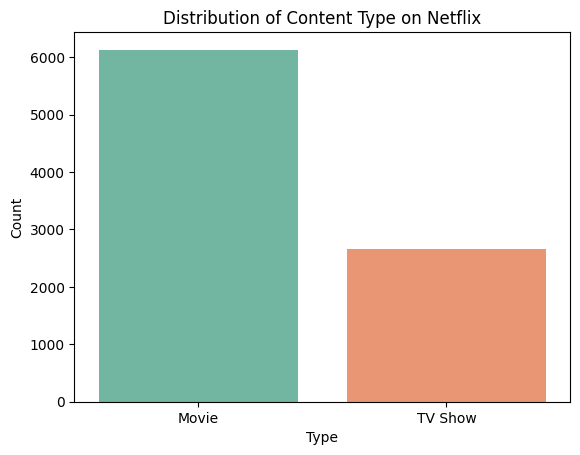

In [17]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

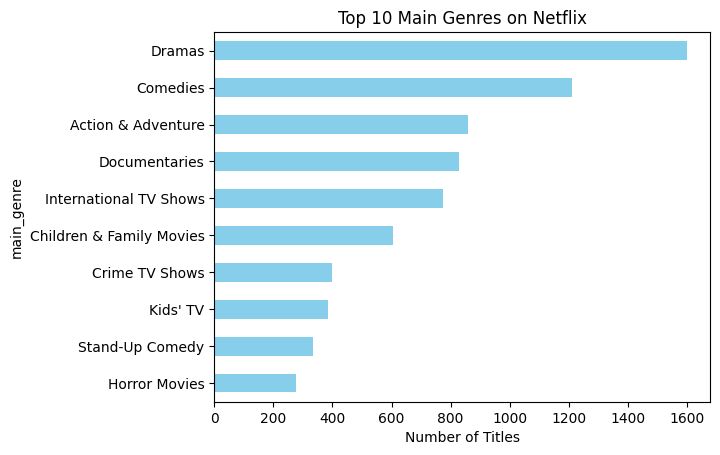

In [18]:
top_genres = df['main_genre'].value_counts().head(10)
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Main Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis() 
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_24652\2191397040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='pastel')


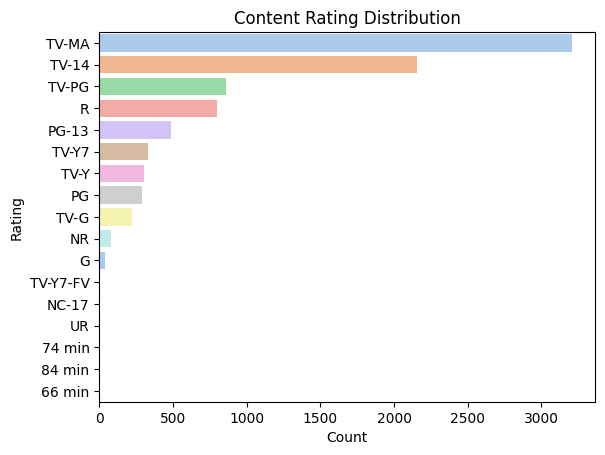

In [19]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='pastel')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

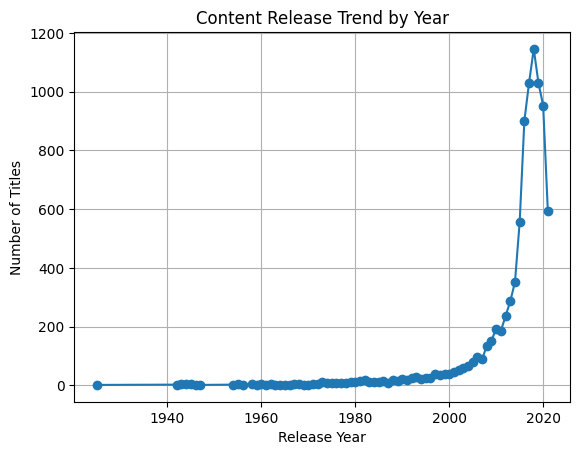

In [20]:
# Plot content by release year
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Release Trend by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

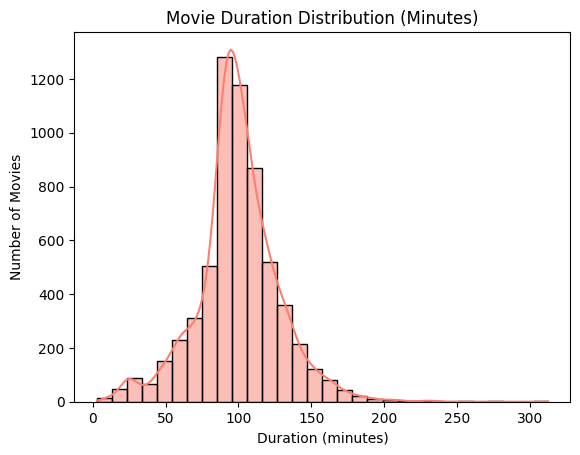

In [21]:
# Filter movies and show histogram
movies_df = df[df['type'] == 'Movie']
sns.histplot(movies_df['duration_int'], bins=30, kde=True, color='salmon')
plt.title('Movie Duration Distribution (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [22]:
import plotly.express as px

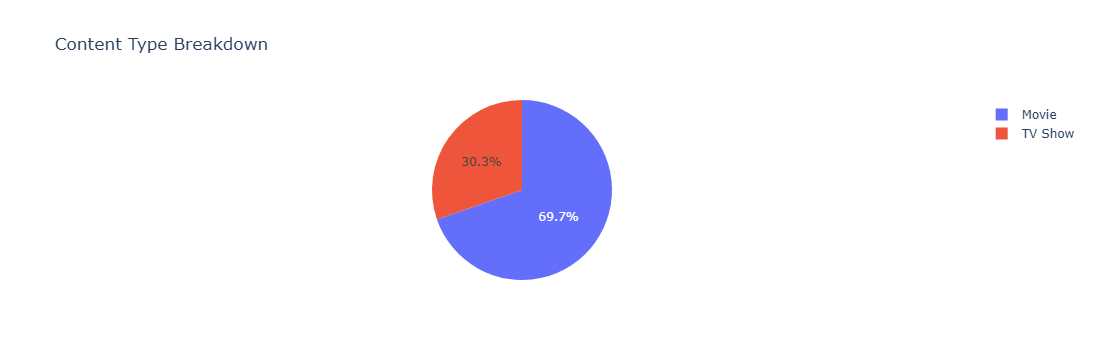

In [23]:
fig = px.pie(df, names='type', title='Content Type Breakdown')
fig.show()

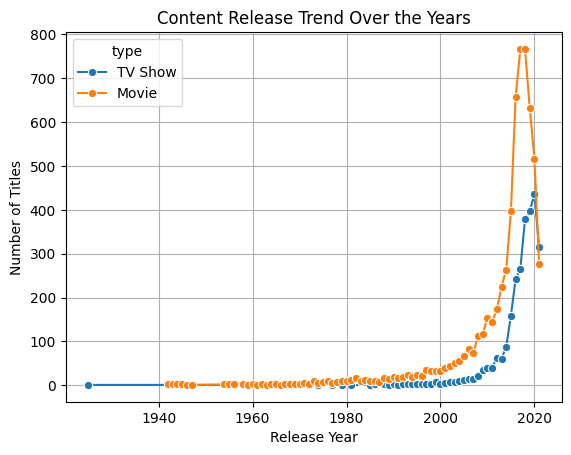

In [24]:
# Group by release_year and type
content_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')
# Line plot
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.title('Content Release Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

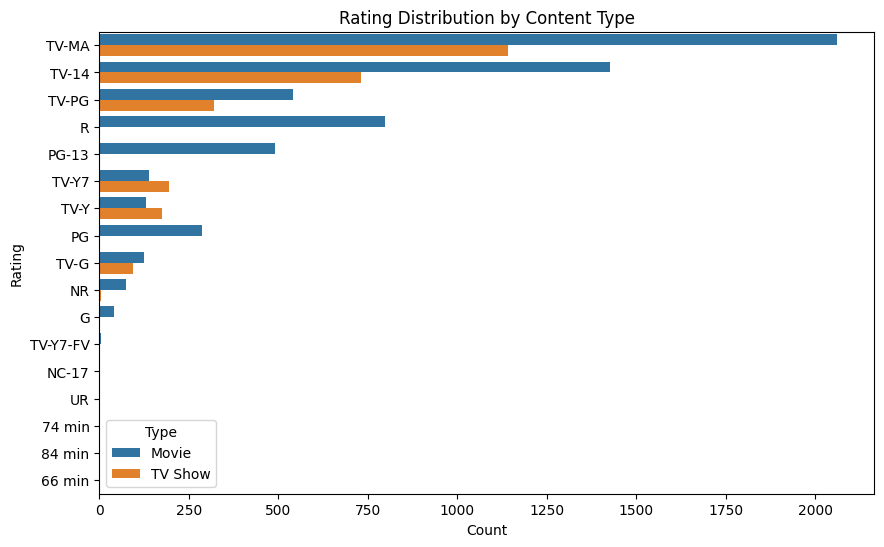

In [25]:
# Countplot of rating by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Rating Distribution by Content Type')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()

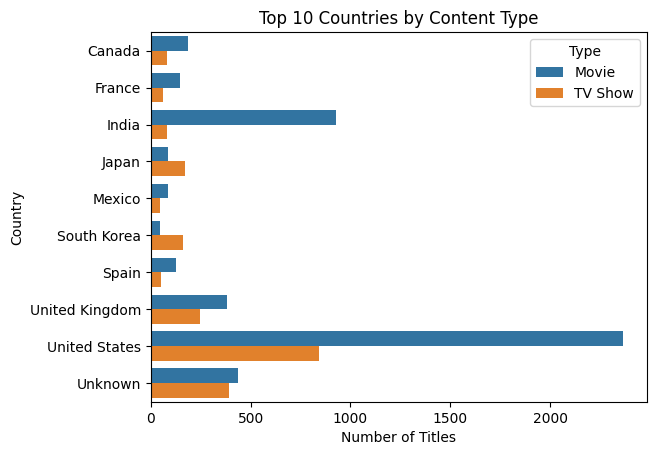

In [26]:
# Top 10 Countries by Content Type
from collections import Counter
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0] if x != 'Unknown' else 'Unknown')
country_type = df.groupby(['primary_country', 'type']).size().reset_index(name='count')
top_countries = df['primary_country'].value_counts().head(10).index
top_country_type = country_type[country_type['primary_country'].isin(top_countries)]
sns.barplot(data=top_country_type, x='count', y='primary_country', hue='type')
plt.title('Top 10 Countries by Content Type')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.legend(title='Type')
plt.show()

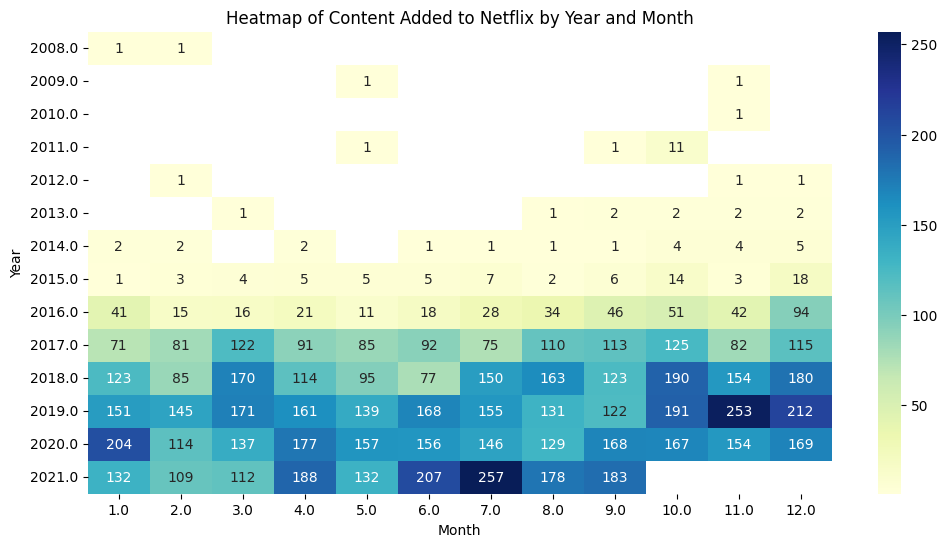

In [27]:
# Heatmap for number of contents added by year and month
heatmap_data = df.pivot_table(index='year_added', columns='month_added', values='show_id', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Content Added to Netflix by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

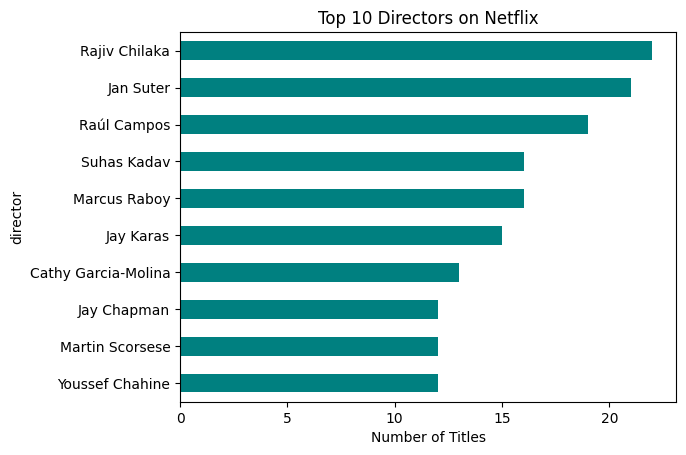

In [28]:
# Most Frequent Directors
from collections import Counter
director_counts = df[df['director'] != 'Unknown']['director'].str.split(', ').explode().value_counts().head(10)
director_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

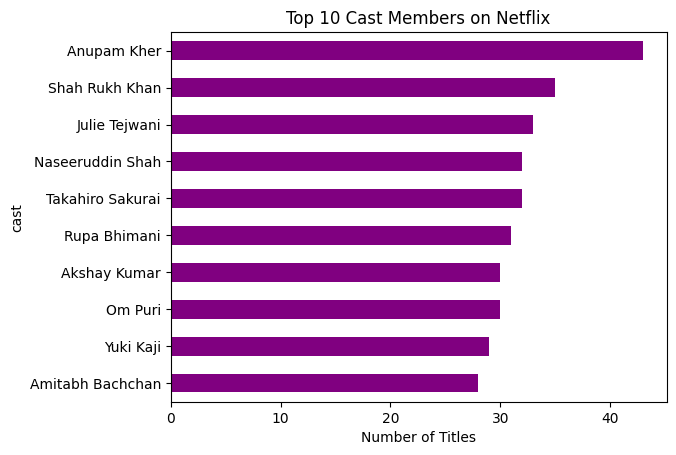

In [29]:
# Most Frequent cast members
cast_counts = df[df['cast'] != 'Unknown']['cast'].str.split(', ').explode().value_counts().head(10)
cast_counts.plot(kind='barh', color='purple')
plt.title('Top 10 Cast Members on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

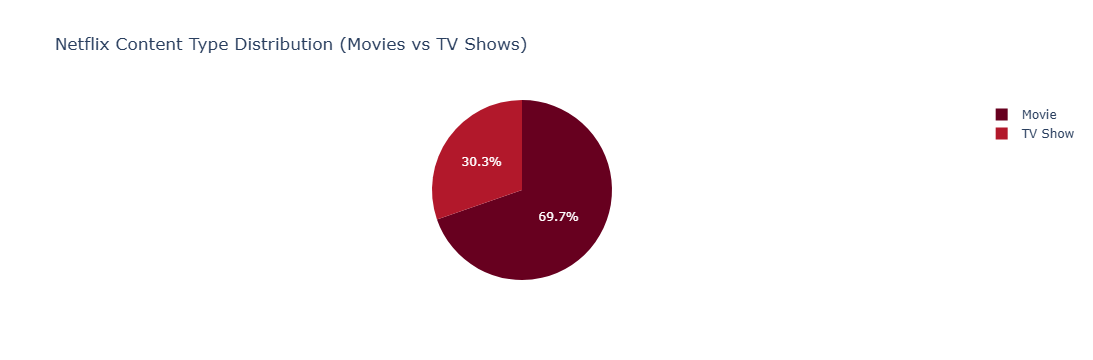

In [30]:
import plotly.express as px
fig = px.pie(df, names='type', title='Netflix Content Type Distribution (Movies vs TV Shows)',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

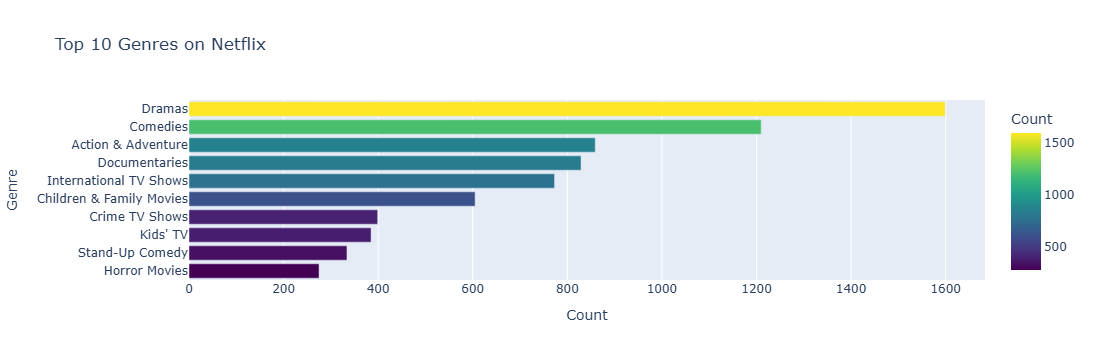

In [31]:
top_genres = df['main_genre'].value_counts().nlargest(10).reset_index()
top_genres.columns = ['Genre', 'Count']
fig = px.bar(top_genres, x='Count', y='Genre', orientation='h',
             title='Top 10 Genres on Netflix',
             color='Count', color_continuous_scale='Viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

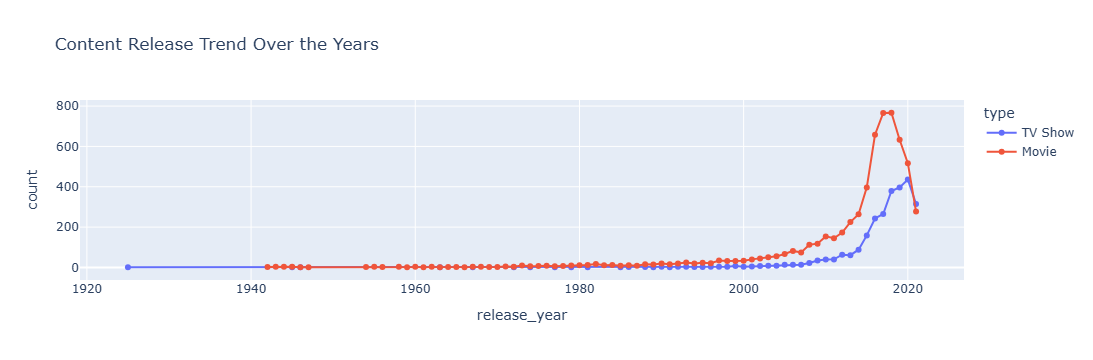

In [32]:
release_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')
fig = px.line(release_trend, x='release_year', y='count', color='type',
              title='Content Release Trend Over the Years',
              markers=True)
fig.update_traces(mode='lines+markers')
fig.show()

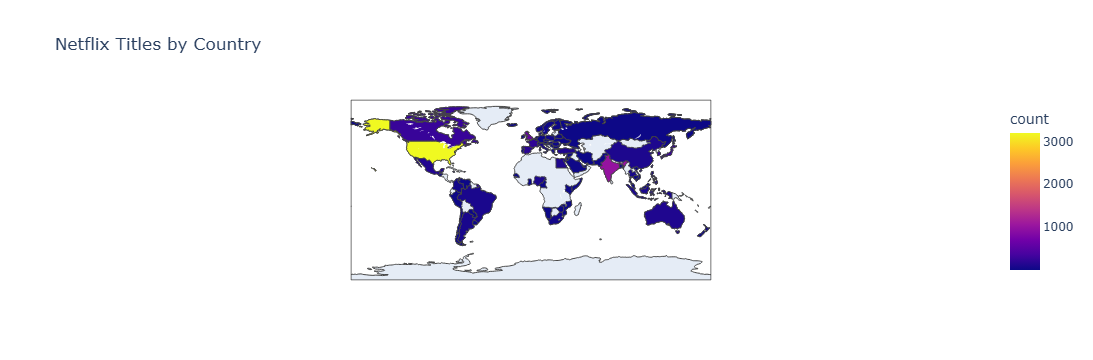

In [33]:
country_counts = df['primary_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    title='Netflix Titles by Country',
                    color_continuous_scale='plasma')
fig.show()

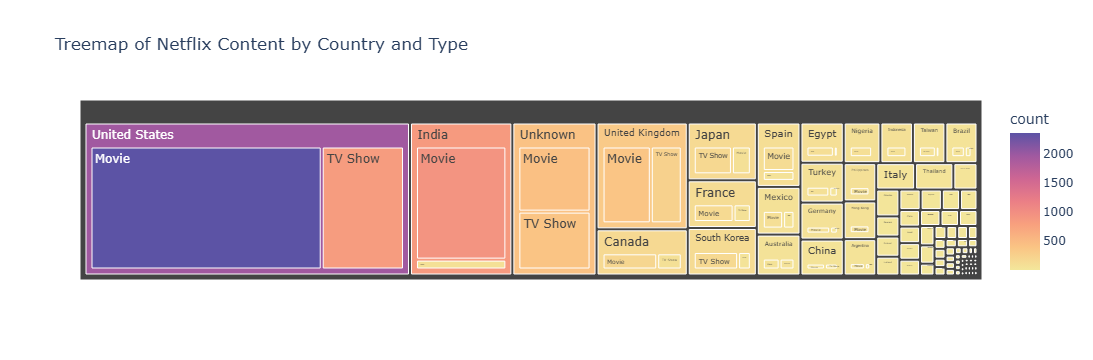

In [34]:
country_type_counts = df.groupby(['primary_country', 'type']).size().reset_index(name='count')
fig = px.treemap(country_type_counts,
                 path=['primary_country', 'type'],
                 values='count',
                 title='Treemap of Netflix Content by Country and Type',
                 color='count',
                 color_continuous_scale='sunset')
fig.show()